<a href="https://colab.research.google.com/github/eco-abhi/Pytorch/blob/main/Pytorch_ANN_For_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # Uniformly distributed between (-3, +3)
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

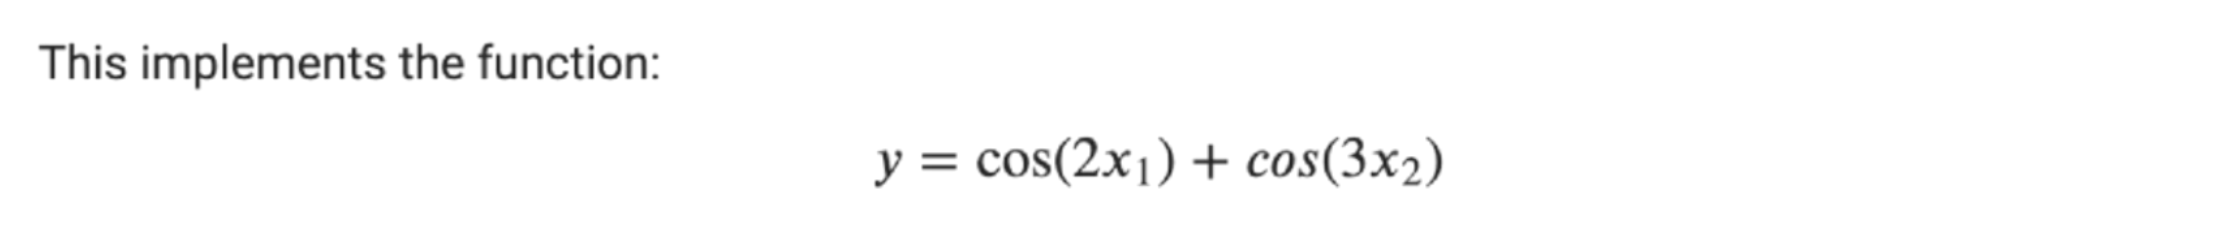

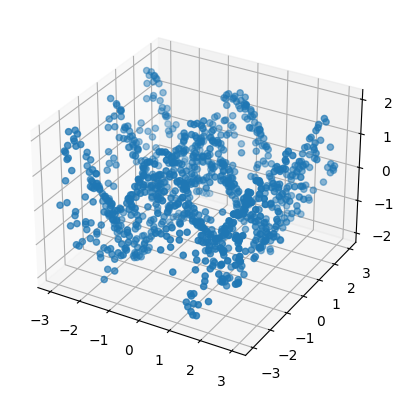

In [5]:
# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [7]:
# Build the model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)


In [9]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [10]:
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):

  train_losses = np.zeros(epochs)

  for it in range(epochs):

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass: Compute predicted y by passing x to the model
      outputs = model(X_train)

      # Compute and print loss
      loss = criterion(outputs, y_train)

      # Backward pass: Compute gradient of the loss with respect to model parameters
      loss.backward()

      # Update parameters
      optimizer.step()

      # Save losses
      train_losses[it] = loss.item()

      if (it + 1) % 50 == 0:
          print(f"Epoch: {it+1}/{epochs}, Trian Loss: {loss.item():.4f}")

  return train_losses

In [13]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch: 50/1000, Trian Loss: 0.0416
Epoch: 100/1000, Trian Loss: 0.0314
Epoch: 150/1000, Trian Loss: 0.0241
Epoch: 200/1000, Trian Loss: 0.0186
Epoch: 250/1000, Trian Loss: 0.0144
Epoch: 300/1000, Trian Loss: 0.0105
Epoch: 350/1000, Trian Loss: 0.0078
Epoch: 400/1000, Trian Loss: 0.0062
Epoch: 450/1000, Trian Loss: 0.0051
Epoch: 500/1000, Trian Loss: 0.0043
Epoch: 550/1000, Trian Loss: 0.0038
Epoch: 600/1000, Trian Loss: 0.0033
Epoch: 650/1000, Trian Loss: 0.0030
Epoch: 700/1000, Trian Loss: 0.0027
Epoch: 750/1000, Trian Loss: 0.0025
Epoch: 800/1000, Trian Loss: 0.0023
Epoch: 850/1000, Trian Loss: 0.0022
Epoch: 900/1000, Trian Loss: 0.0020
Epoch: 950/1000, Trian Loss: 0.0019
Epoch: 1000/1000, Trian Loss: 0.0018


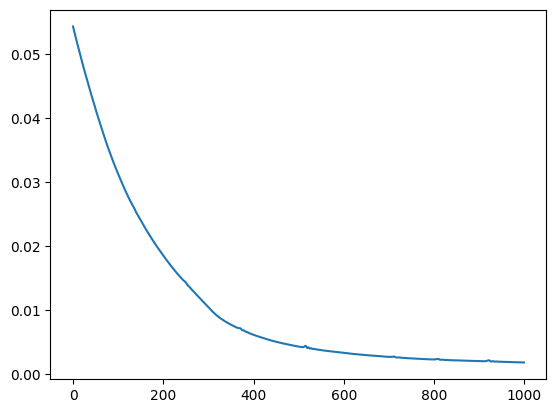

In [14]:
plt.plot(train_losses)
plt.show()

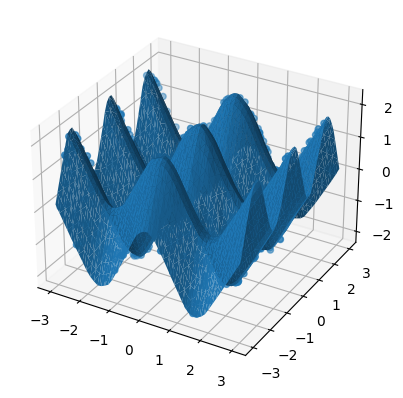

In [15]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)

plt.show()